# Regressions for datasets with information on the scatter


"Linear regression in astronomy II" by Feigelson & Babu, 1992 ([see bibliography.bib](https://github.com/astroJeff/SMAC/blob/master/bibliography.bib)).


# Independetly known variance
In some situations the scatter of variables ($x_i$,$y_i$) may be known independently of the sample.
For example, the width of the main sequence in globular cluster color-magnitude diagrams may serve
as a mesure of scatter of stellar luminosities, the scatter of a variable in a well-studied calibration
data set might be applied to a new sample, or repeated observations of the same object might be studied.
The regression solution for one such class of problems is well established. If the intrinsic variance
in $X$ is $\sigma_x^2$ and in $Y$ is $\sigma_y^2$, one can define the ratio $l = \sigma_x^2/\sigma_y^2$.
The solutions for l = 0, 1, and $\infty$ are simply $OLS(X|Y)$, orthogonal and $OLS(Y|X)$ lines that we
duscussed before. For arbitrary $l$ and assumiming all residuals are distributed as Gaussians, the
least-squares estimate of the slope is

![title](img/Feig_fig1.png)

For more general case where the residuals are not assumed to have Gaussian distributions,
the appropriate slope variance is
![title](img/Feig_fig2.png)
Note that these models should only be used with scale-free (e.g. log) variables
(except when l = 0 or $\infty$). As with the orthogonal regression line, these slopes will
change when one of the variables is expressed in diffrent units.

# Measurement error regression models

In some astronomical regressions, the scatter about the line is primarily due to the measurement process. 
In statistics, problems where the true points lie precisely on the line are called "functional" regression models, while problems where the true points are scattered about the line are called "structural" regression models. Functional models are appropriate when measurement errors exceed intrinsic scatters, or when the intrinsic scatter is obviously zero (e.g. measurements of the same property and objects using different detectors).

## Heteroscedastic functional model
The model is expressed as follows: if the true relation is
$$Y = \alpha + \beta X,$$
the measured quantities are
$$x_i = X_i + \delta_i,$$
$$y_i = Y_i + \epsilon_i,$$
and the ratio of measurement error variances is defined to be
$$\lambda_i = \sigma^2(\epsilon_i)/\sigma^2(\delta_i)$$.
The heteroscedastic case is where the measurement errors are different for each point and each variable i.e. $\lambda_i \neq constant$, but the intrinsic points are still assumed to lie exactly on a line, weighted regressions are used.

If the measurement error is confined to the dependent variable, then wighting each by $1/\sigma^2(\delta_i)$ and applying the $OLS(Y|X)$ line is standard.

When $\lambda_i \neq 0$ and heteroscedastic measurement errors are present in both variables, then a "doubly weighted" regression is the appropriate generalizaton of $OLS(Y|X)$. This situation occurs when different objects are observed with different signal-to-noise rations. Here one finds regression coefficients $\alpha$ and $\beta$ that minimize the quantity
$$S = \sum [(x_i - \hat{x_i})^2/\sigma^2(\delta_i) + (y_i - \hat{y_i})^2/\sigma^2(\epsilon_i)],$$
where $(\hat{x_i},\hat{y_i})$ are the observed $(x_i,y_i)$ "adjusted" to lie on the $Y = \alpha + \beta X$ line by sliding them along a line of slope $\lambda_i$.

# Example of doubly weighted ODR

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.odr.odrpack import *
import sys
from scipy import stats

%matplotlib inline

######## ODR with weights ########
Beta: [ 1.26436434  0.14125264]
Beta Std Error: [ 0.03293138  0.25882696]
Beta Covariance: [[ 0.00054475 -0.00424111]
 [-0.00424111  0.03365113]]
Residual Variance: 1.99076243866
Inverse Condition #: 0.0640228573189
Reason(s) for Halting:
  Sum of squares convergence
######## OLS ########
Beta: [ 1.21408961  0.53225508]
Beta Std Error: [ 0.03216758  0.23896155]
Beta Covariance: [[  9.58283637e-05  -7.04434667e-04]
 [ -7.04434667e-04   5.28826760e-03]]
Residual Variance: 10.7979823129
Inverse Condition #: 0.0653013749678
Reason(s) for Halting:
  Sum of squares convergence


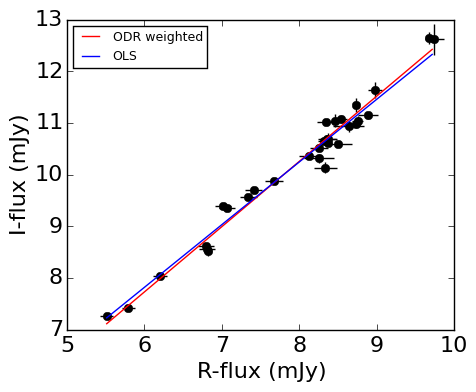

In [21]:
# Load up the data
fluxes = np.loadtxt('IR.dat', comments='#')

I    = fluxes[:,1]
Ierr = fluxes[:,2]
R    = fluxes[:,3]
Rerr = fluxes[:,4]

def f(B, x):
    return B[0]*x + B[1]

data = RealData(R, I, sx=Rerr, sy=Ierr)
model = Model(f)
regression = ODR(data,model,[0,1])
outp = regression.run()

print("######## ODR with weights ########")
outp.pprint()

regression.set_job(fit_type=2)
outp_ols = regression.run()
print("######## OLS ########")
outp_ols.pprint()

# plotting
figure = plt.figure(figsize=(5.0, 4.0), dpi=150)
font = {'size'   : 16, 'family' : 'sans-serif'}
mpl.rc('font', **font)
figure.subplots_adjust(hspace=0.1)
fig1 = plt.subplot(111)

plt.errorbar(R,I,xerr=Rerr,yerr=Ierr,color='k', marker='o', markeredgecolor='k',\
             ms=6., capsize=0, linestyle='None', fmt='')


x = np.arange(min(R),max(R),0.1)
y = f(outp.beta,x)
y_ols = f(outp_ols.beta,x)

plt.plot(x,y,c='r',label="ODR weighted")
plt.plot(x,y_ols,c='b',label="OLS")
plt.xlabel('R-flux (mJy)')
plt.ylabel('I-flux (mJy)')
plt.legend(prop={'size':9},loc=2)

plt.show()
plt.close()
plt.cla()
plt.clf()
